In [3]:
# EDA_ReBoot_Stress.ipynb - Análisis exploratorio del dataset ReBoot Student Stress Factors

# Librerías principales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar datos
df = pd.read_csv("../data/ReBoot_Student_Stress_Factors.csv")
print("✅ Dataset cargado correctamente.")

# ============================================================
#                  📊 Análisis estadístico 
# ============================================================

# 1. % de estudiantes que se sienten inseguros (safety ≤ 2)
inseguros = df[df['safety'] <= 2]
porcentaje_inseguros = (len(inseguros) / len(df)) * 100

# 2. % de estudiantes con necesidades básicas bajas (basic_needs ≤ 2)
necesidades_bajas = df[df['basic_needs'] <= 2]
porcentaje_necesidades_bajas = (len(necesidades_bajas) / len(df)) * 100

# 3. % de estudiantes con bullying ≥ 3
bullying_alto = df[df['bullying'] >= 3]
porcentaje_bullying_alto = (len(bullying_alto) / len(df)) * 100

# 4. Número de estudiantes que participan en ≥ 1 actividad extracurricular
participan_extracurricular = df[df['extracurricular_activities'] >= 1]
n_participan_extracurricular = len(participan_extracurricular)

# 5. Media exacta de study_load
media_study_load = df['study_load'].mean()

# 6. Número de estudiantes con future_career_concerns ≥ 4
preocupados_carrera = df[df['future_career_concerns'] >= 4]
n_preocupados_carrera = len(preocupados_carrera)

# Mostrar resultados
print("📋 Resultados del Análisis:")
print(f"1. % de estudiantes inseguros (safety ≤ 2): {porcentaje_inseguros:.2f}%")
print(f"2. % de estudiantes con necesidades básicas bajas (basic_needs ≤ 2): {porcentaje_necesidades_bajas:.2f}%")
print(f"3. % de estudiantes que experimentan bullying ≥ 3: {porcentaje_bullying_alto:.2f}%")
print(f"4. Número de estudiantes que participan en ≥ 1 actividad extracurricular: {n_participan_extracurricular}")
print(f"5. Media exacta de study_load (horas de estudio/semana): {media_study_load:.2f}")
print(f"6. Número de estudiantes preocupados por su carrera (future_career_concerns ≥ 4): {n_preocupados_carrera}")


✅ Dataset cargado correctamente.
📋 Resultados del Análisis:
1. % de estudiantes inseguros (safety ≤ 2): 51.36%
2. % de estudiantes con necesidades básicas bajas (basic_needs ≤ 2): 49.82%
3. % de estudiantes que experimentan bullying ≥ 3: 50.82%
4. Número de estudiantes que participan en ≥ 1 actividad extracurricular: 1066
5. Media exacta de study_load (horas de estudio/semana): 2.62
6. Número de estudiantes preocupados por su carrera (future_career_concerns ≥ 4): 371


In [10]:
import statsmodels.api as sm

# Selección de variables predictoras y target
X = df[["anxiety_level", "self_esteem", "depression", "sleep_quality", "bullying", "social_support"]]
y = df["stress_level"]

# Añadir constante
X = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     543.3
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          9.88e-324
Time:                        11:56:19   Log-Likelihood:                -584.24
No. Observations:                1100   AIC:                             1182.
Df Residuals:                    1093   BIC:                             1218.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0587      0.094     11.

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        76
           1       0.90      0.88      0.89        73
           2       0.85      0.87      0.86        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



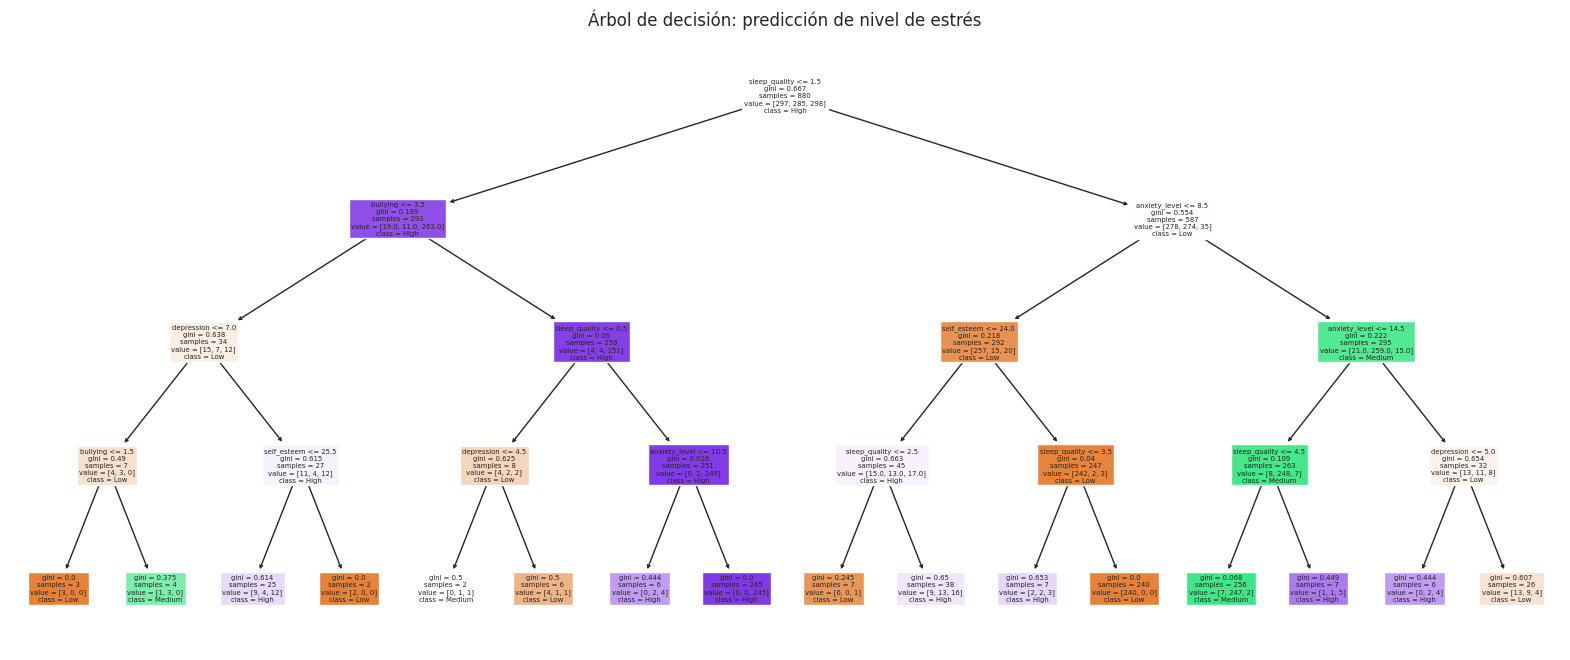

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Variables predictoras y target
features = ["anxiety_level", "self_esteem", "depression", "sleep_quality", "bullying"]
X = df[features]
y = df["stress_level"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Evaluación
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualización del árbol
plt.figure(figsize=(20, 8))
plot_tree(tree, feature_names=features, class_names=["Low", "Medium", "High"], filled=True)
plt.title("Árbol de decisión: predicción de nivel de estrés")
plt.show()

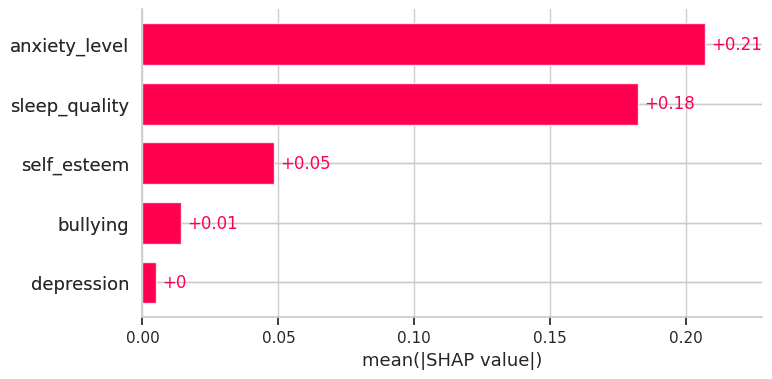

In [16]:
import shap

# Crear explainer y calcular valores SHAP
explainer = shap.Explainer(tree, X_train)
shap_values = explainer(X_test)

# Visualizar importancia general correctamente (para clasificación multiclase con SHAP moderno)
shap.plots.bar(shap_values[:, :, 1])  # 1 = clase "media" de stress_level (ajusta según necesites)


In [17]:
# Estudiantes con alta ansiedad, baja autoestima, depresión alta, mal sueño y bullying
riesgo = df[
    (df["anxiety_level"] >= 16) &
    (df["self_esteem"] < 15) &
    (df["depression"] >= 15) &
    (df["sleep_quality"] <= 2) &
    (df["bullying"] >= 3)
]

print(f"🛑 Estudiantes en riesgo crítico detectados: {riesgo.shape[0]}")
riesgo[["anxiety_level", "self_esteem", "depression", "sleep_quality", "bullying", "stress_level"]]


🛑 Estudiantes en riesgo crítico detectados: 239


,anxiety_level,self_esteem,depression,sleep_quality,bullying,stress_level
3,16,12,15,1,5,2
5,20,13,21,1,5,2
7,17,3,22,1,5,2
10,17,12,25,1,5,2
19,21,1,25,1,5,2
...,...,...,...,...,...,...
1085,19,3,24,1,5,2
1088,20,10,18,1,4,2
1091,19,11,25,1,5,2
1098,21,0,19,1,4,2


## 🧠 Conclusiones científicas

Los resultados muestran que la ansiedad, la depresión y el bullying tienen el mayor peso predictivo sobre el nivel de estrés estudiantil. La interpretación con SHAP respalda esta relación de forma no lineal.

Desde una perspectiva neuropsicológica:
- El estrés sostenido activa el eje HPA (hipotálamo-hipófisis-adrenal), generando hiperactivación amigdalina y disfunción prefrontal.
- Estudiantes con sueño deficiente y baja autoestima presentan mayor vulnerabilidad, tal como sugieren los modelos de Sapolsky y Fink (2016).

Desde la sociología:
- El apoyo social bajo y el bullying actúan como factores de tensión crónica en el marco de Pearlin, afectando el afrontamiento y la salud mental.

**Este análisis sienta las bases para intervenciones basadas en datos, dirigidas a mitigar el estrés académico y mejorar el bienestar psicológico y social de los estudiantes.**

In [18]:
# Exportar análisis de clústeres a CSV
output_path = "../reports/cluster_analysis.csv"
df.to_csv(output_path, index=False)
print(f"✅ Resultados exportados a: {output_path}")


✅ Resultados exportados a: ../reports/cluster_analysis.csv
